In [8]:
# %load ../../misc/utils/import.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime

from pandas_ods_reader import read_ods

#Display Settings
pw = 16
ph = 9
matplotlib.rcParams['figure.figsize'] = (pw, ph)

#Pandas Dsiplay
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 200

# import warnings
# warnings.filterwarnings('ignore')

In [9]:
#Read df
file_name = 'NEZ_OPENDATA_2018_20190125.ods' # year 2018

columns = ['id', 'date', 'long', 'lat', 'acc_outcome' ,'acc_type', 'description']
df = read_ods(file_name, 1, columns=columns)
print("Number of accidents {}".format(len(df)))

Number of accidents 18062


In [10]:
#Sample
df.sample(5, random_state=23)

,id,date,long,lat,acc_outcome,acc_type,description
16955,1238693.0,"12.12.2018,10:00",20.433700,44.794530,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu
1340,1206484.0,"30.01.2018,12:05",20.478430,44.810850,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK,"Najmanje dva vozila koja se kreću istim putem u istom smeru uz skretanje, skretanje ulevo ispred drugog vozila"
11270,1226790.0,"23.08.2018,17:45",20.482780,44.731640,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgode sa učešćem jednog vozila na mestu na kome se izvode radovi na putu
11251,1228235.0,"23.08.2018,15:00",20.419994,44.821166,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Ostali sudari sa parkiranim vozilom
5128,1213844.0,"16.04.2018,09:50",20.453719,44.800287,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smeru – sustizanje


In [11]:
#To date-time
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')

In [12]:
#Check Duplicates
dupl_ids = df[df.duplicated(subset=['id'])]['id']

df.set_index('id').sort_index().loc[dupl_ids].head(4)

,date,long,lat,acc_outcome,acc_type,description
id,,,,,,
1231373.0,2018-01-10 14:50:00,20.518139,44.787133,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smeru – uključivanje u saobraćaj
1231373.0,2018-01-10 14:50:00,20.518139,44.787133,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila – suprotni smerovi bez skretanja – kretanje unazad
1234482.0,2018-01-11 12:05:00,20.466038,44.787856,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK,"Najmanje dva vozila koja se kreću istim putem u istom smeru uz skretanje, polukružno okretanje ispred drugog vozila"
1234482.0,2018-01-11 12:05:00,20.466038,44.787856,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK,"Najmanje dva vozila koja se kreću istim putem u istom smeru uz skretanje, skretanje ulevo ispred drugog vozila"


In [13]:
#Drop Duplictates
print("Before duplicates removal {}".format(len(df)))
df = df.drop_duplicates(subset=['id'])
print("After duplicates removal {}".format(len(df)))

Before duplicates removal 18062
After duplicates removal 17956


## Accidents Outcomes

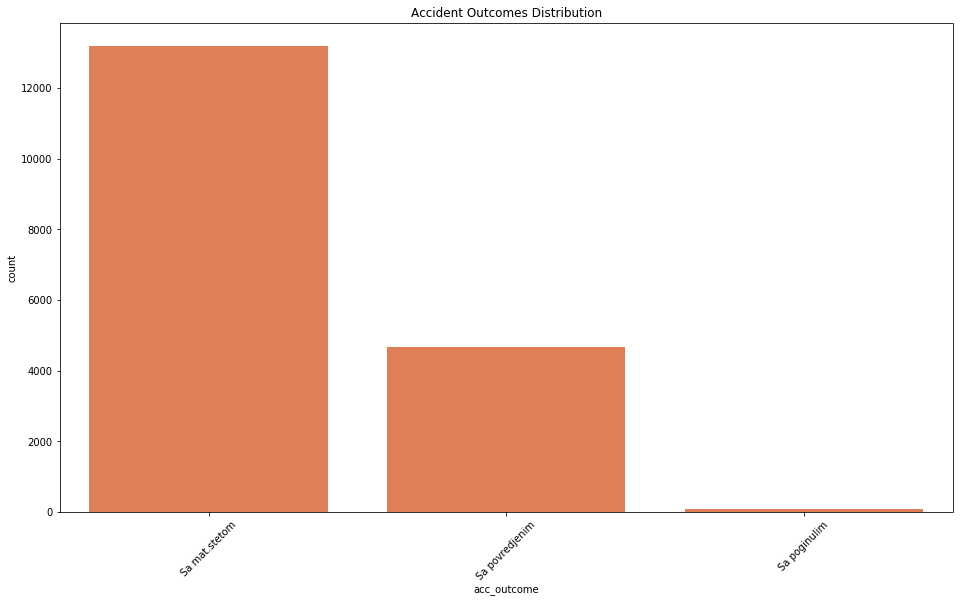

In [14]:
#Plot
order = df['acc_outcome'].value_counts().index

ax = sns.countplot(df['acc_outcome'], order=order, color='#f57542');

ax.set_title('Accident Outcomes Distribution')
plt.xticks(rotation=45);

In [15]:
df['acc_outcome'].value_counts()

Sa mat.stetom     13179
Sa povredjenim     4679
Sa poginulim         98
Name: acc_outcome, dtype: int64

In [92]:
df[df['acc_outcome'] == 'Sa poginulim'].sample(5, random_state=23)

,id,date,long,lat,acc_outcome,acc_type,description,day_of_week
10419,1224782.0,2018-04-08 09:30:00,20.46242,44.814240,Sa poginulim,SN SA PEŠACIMA,"Pešak stoji ili se kreće, sa kretanjem vozila unazad",Sun
16700,1238045.0,2018-07-12 16:35:00,20.30079,44.544749,Sa poginulim,SN SA PEŠACIMA,"Prelazak pešaka sleva, van raskrsnice , bez skretanja vozila",Thu
15980,1236708.0,2018-11-23 03:03:00,20.51999,44.817500,Sa poginulim,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK,Najmanje dva vozila koja se kreću istim putem u suprotnim smerovima uz skretanje ulevo ispred drugog vozila,Fri
729,1205033.0,2018-01-18 02:15:00,20.50784,44.705156,Sa poginulim,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK,Najmanje dva vozila koja se kreću istim putem u suprotnim smerovima uz skretanje ulevo ispred drugog vozila,Thu
9451,1222775.0,2018-12-07 23:30:00,20.45482,44.810620,Sa poginulim,SN SA PEŠACIMA,"Prelazak pešaka sleva, sa skretanjem vozila udesno, u raskrsnici",Fri


## Accident Types

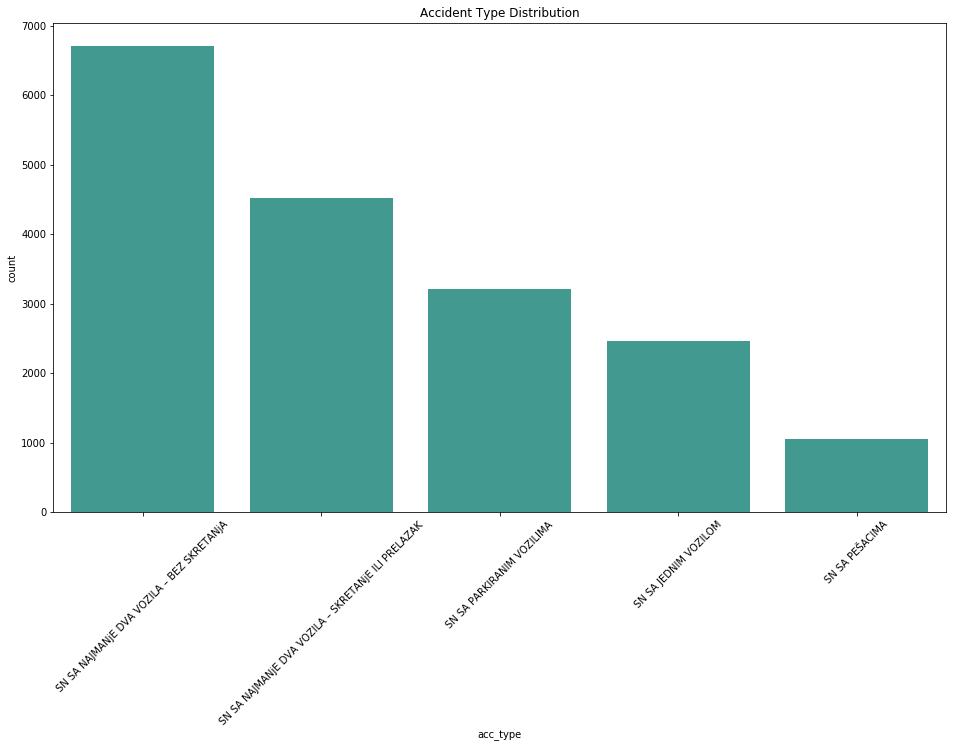

In [17]:
#Plot
order = df['acc_type'].value_counts().index

ax = sns.countplot(df['acc_type'], order=order, color='#32a89b');

ax.set_title('Accident Type Distribution')
plt.xticks(rotation=45);

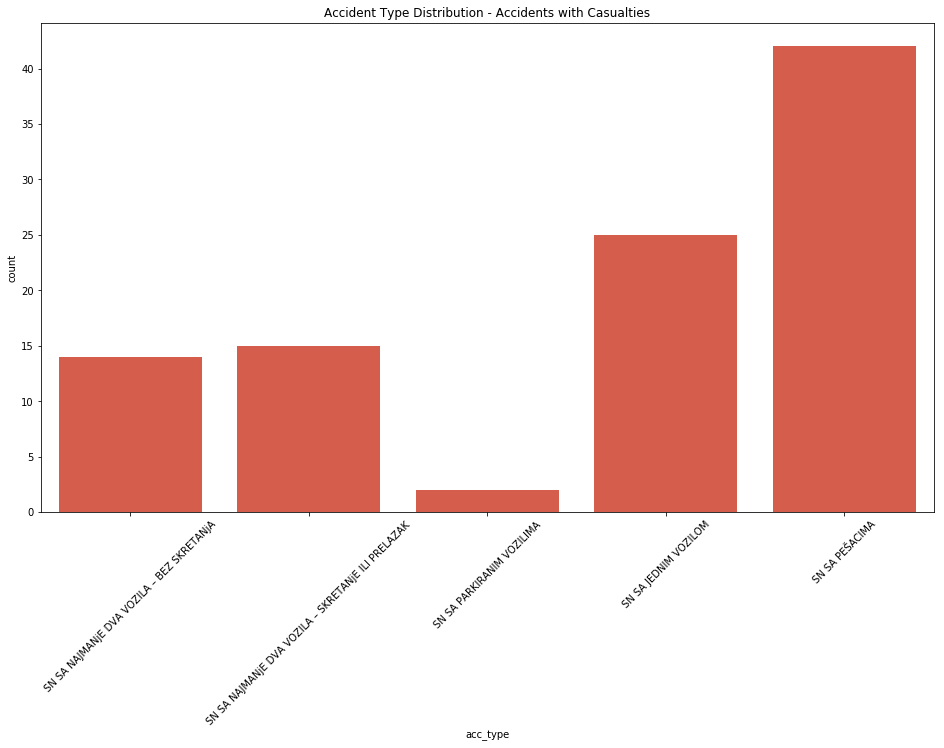

In [18]:
#Plot
topl = df[df['acc_outcome'] == 'Sa poginulim']
order = df['acc_type'].value_counts().index

ax = sns.countplot(topl['acc_type'], order=order, color='#eb4c34');

ax.set_title('Accident Type Distribution - Accidents with Casualties')
plt.xticks(rotation=45);

## Seasonality of Accidents

In [19]:
#Seasonal df
ses_df = df.set_index('date')
ses_df['count'] = 1

#Resample
ses_df = ses_df.resample('1m')[['count']].sum()

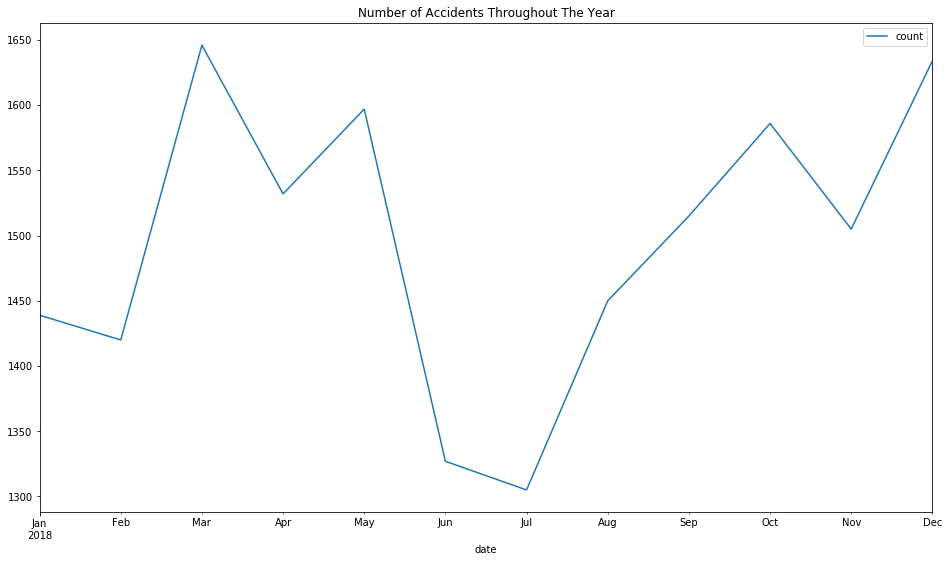

In [20]:
#Plot
ax = ses_df.plot();

ax.set_title('Number of Accidents Throughout The Year');

In [21]:
#Weekday
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['date'].dt.dayofweek.map(day_map)

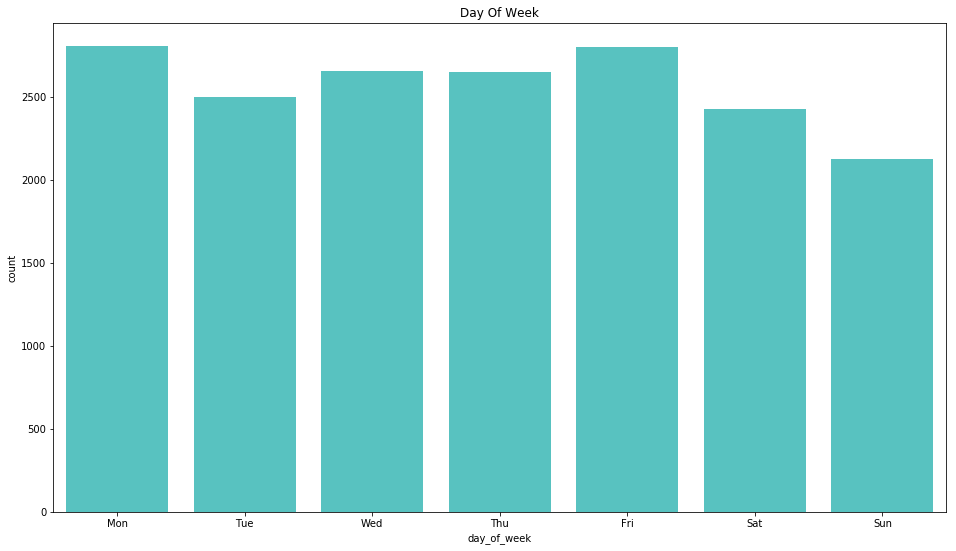

In [22]:
#Plot
ax = sns.countplot(df['day_of_week'], color='#46d4d1');

ax.set_title('Day Of Week');

## GeoLoc 

In [86]:
#Constant
belgrade_loc = {'lat':'44.7866', 'long':'20.4489'}

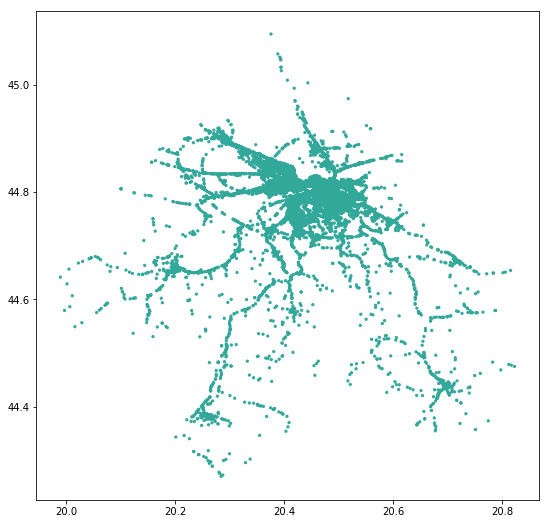

In [97]:
plt.figure(figsize=(ph,ph))

plt.scatter(df['long'], df['lat'], s=[5] * len(df), color='#32a89b');

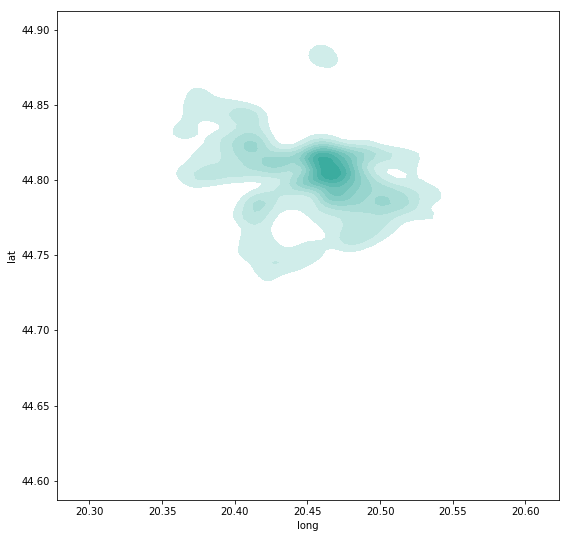

In [120]:
topl = df[(df['long'].between(20.3, 20.6)) & (df['lat'].between(44.6, 44.9))]
plt.figure(figsize=(ph,ph))

sns.kdeplot(topl['long'], topl['lat'], shade=True, shade_lowest=False, color='#32a89b');

In [88]:
from gmplot import gmplot

from IPython.core.display import display, HTML
from IPython.display import IFrame

In [95]:
#Create Heatmap
gmap = gmplot.GoogleMapPlotter(belgrade_loc['lat'],belgrade_loc['long'], zoom=10);

heatmap = gmap.heatmap(df['lat'], df['long'], radius=20)

hm_output = "accidents_heatmap.html"
gmap.draw(hm_output)

In [108]:
#Display Map
IFrame(src=hm_output,width=700, height=600)

## Cycling Accidents

In [127]:
df[df['description'].map(lambda x: 'bicikl' in x )]

,id,date,long,lat,acc_outcome,acc_type,description,day_of_week
985,1206046.0,2018-01-23 23:00:00,20.490963,44.801237,Sa povredjenim,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće suprotno od smera kretanja vozila,Tue
1169,1206472.0,2018-01-27 18:20:00,20.483860,44.881530,Sa mat.stetom,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće suprotno od smera kretanja vozila,Sat
1321,1206828.0,2018-01-30 13:00:00,20.540520,44.787730,Sa povredjenim,SN SA PEŠACIMA,Pešak zaustavljen na trotoaru ili biciklističkoj stazi,Tue
1368,1206459.0,2018-01-30 22:00:00,20.515920,44.792080,Sa povredjenim,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće u smeru kretanja vozila,Tue
2742,1209313.0,2018-02-28 20:00:00,20.397996,44.826497,Sa povredjenim,SN SA PEŠACIMA,Pešak zaustavljen na trotoaru ili biciklističkoj stazi,Wed
1502,1206875.0,2018-03-02 13:00:00,20.504304,44.788172,Sa povredjenim,SN SA PEŠACIMA,Pešak se kreće na trotoaru ili biciklističkoj stazi,Fri
6008,1217219.0,2018-03-05 14:50:00,20.408290,44.825100,Sa povredjenim,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće u smeru kretanja vozila,Mon
3981,1211633.0,2018-03-23 16:55:00,20.512524,44.747506,Sa povredjenim,SN SA PEŠACIMA,Pešak zaustavljen na trotoaru ili biciklističkoj stazi,Fri
5407,1215659.0,2018-04-21 17:20:00,20.696480,44.435290,Sa povredjenim,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće u smeru kretanja vozila,Sat
5644,1216894.0,2018-04-25 10:00:00,20.466154,44.801506,Sa povredjenim,SN SA PEŠACIMA,Pešak se na trotoaru ili biciklističkoj stazi kreće u smeru kretanja vozila,Wed


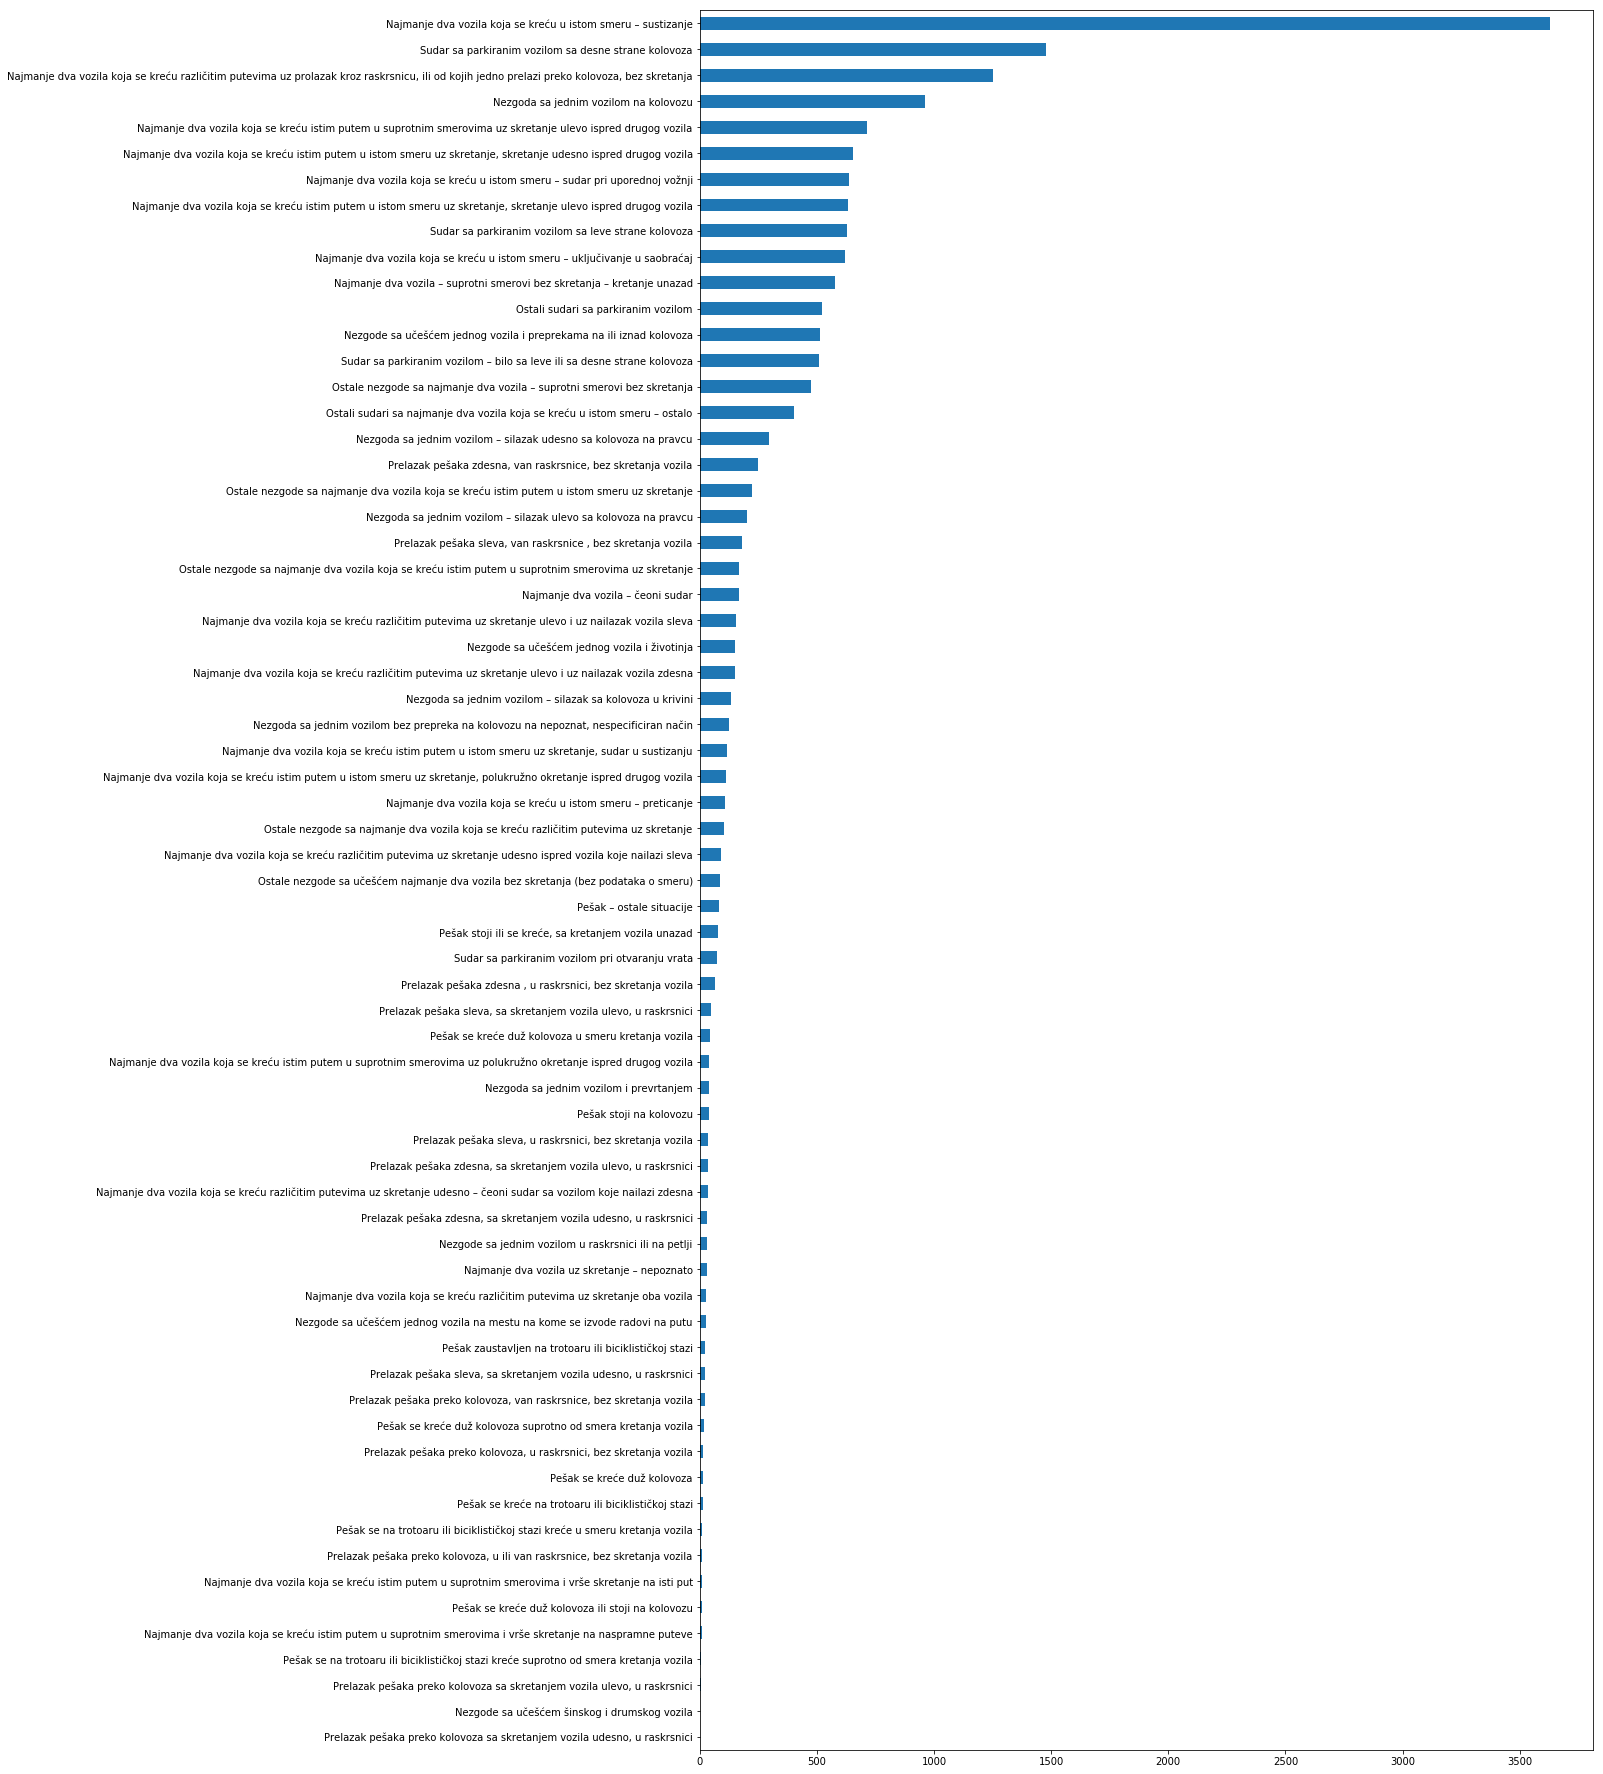

In [139]:
plt.figure(figsize=(pw, 2*pw))
df['description'].value_counts()[::-1].plot(kind='barh');